# CSCI E-109a: Term Project
**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">

## Twitter Bot Detector: EDA and Revised Project Statement
**Group 11**<br/>

<hr style="height:2pt">

### Twitter Accounts Data

Twitter Bot Detector, the CSCI S-109a term project for Group 11, intends to use two separate models classify Twitter accounts as either autonomous (bot) or authentic (genuine). One model will be based on Natural Language Processing (NLP) and the other model will be based on classification. The original dataset used for this project was obtained from the Bot Repository (https://botometer.iuni.iu.edu/bot-repository/index.html). The dataset was modified and queried for relevant features using Google's BigQuery application. The response variable, `label`, was originally a categorical attribute and has been converted to a binary numerical variable: `0` for bot and `1` for genuine. For suitable and efficient processing, a randomized subset of the original dataset was used for this project; observations with missing values were excluded and attributes deemed as irrelevant were omitted. The original dataset had over 100,000 observations and roughly 9000 randomly sampled observations were used for adequate and efficient computational processing. 

The dataset for this project, titled `twitterAccts_df`, consists of account attributes for bot and genuine Twitter Accounts. The final attributes of the dataset includes the following:
- `label`: boolean; `0` for bot and `1` for genuine
- `count_tweets`: total number of tweets
- `count_words`: total number of words
- `count_in_reply_to_status_id`: total number of replies based on the status ID (of a tweet)
- `count_in_reply_to_user_id`: total number of replies based on the user ID
- `count_in_reply_to_screen_name`: total number of replies to a screen name (aka Twitter handle)
- `count_retweeted_status_id`: total number of retweets based on status ID (of a tweet)
- `count_place`: total number of tweets with a geolocation 
- `sum_retweet_count`: total number of retweets
- `sum_reply_count`: total number of replies
- `sum_favorite_count`: total number of times one user's tweets were favorited
- `possibly_sensitive`: boolean; field only surfaces when a Tweet contains a link. The meaning of the field doesn’t pertain to the Tweet content itself, but instead it is an indicator that the URL contained in the Tweet may contain content or media identified as sensitive content.
- `sum_num_hastags`: total number of hashtags used
- `sum_num_urls`: total number of tweets with a URL
- `sum_num_mentions`: total number of mentions by others
- `words_per_tweet`: average words per tweet
- `retweets_per_tweet`: average retweets per tweet
- `reply_per_tweet`: average replies per tweet
- `favcounts_per_tweet`: average retweets per tweet
- `percent_sensitive_tweets`: fraction of sensitive tweets from total tweets
- `hashtags_per_tweet`: average number of hashtags per tweet
- `urls_per_tweet`: average number of URLs per tweet
- `mentions_per_tweet`: average mentions per tweet


Numerical summaries provide a quantitative perspective on the type of data values in the Twitter dataset. All numerical attributes had summary statistics generated. Looking at the description of the statistical summaries, it is apparent that many attributes have a large range of values. For example, `count_words` has a minimum value of `1` and a maximum value of `3383`. However, `urls_per_tweet` has a minimum of `0` and a maximum of `2`. A pure statistical perspective on the range of attributes might raise concern. However, knowledge of social media platforms and the Twitter application provides some insight on the range of values. Twitter account holders are not always "active tweeters" and have accounts to read tweets that aggregate on their news feed, view other accounts, and/or interact with other tweets (e.g., favoriting, replying). This would explain the minimum of `0` for some attributes.

Graphical summaries provide a visual perspective on the type of data in the dataset. Pairwise matrix plots were created to depict potential correlational structures of the predictor attributes and provide insight on possible collinearity. Each datapoint was colored based on their respective account label: red for bot (or 0) and green for genuine (or 1). An initial visual inspection suggests some linear relationships between attributes, such as `count_tweets` and `count_words`. The coloring of the account labels suggest there are distinct clusters for the number of tweets, retweets, urls used, words per tweet for bot accounts and genuine accounts. Scatterplots were generated to explore the relationships between the attributes more.


#### Data Processing & Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

import seaborn as sns

from datetime import datetime

%matplotlib inline



In [3]:
twitterAccts_df = pd.read_csv("summarize_accounts.csv", index_col=0) 

In [4]:
twitterAccts_df.head()

,label,count_tweets,count_words,count_truncated,count_in_reply_to_status_id,count_in_reply_to_user_id,count_in_reply_to_screen_name,count_retweeted_status_id,count_place,sum_retweet_count,sum_reply_count,sum_favorite_count,count_favorited,count_retweeted,possibly_sensitive,sum_num_hastags,sum_num_urls,sum_num_mentions,max_created_at,min_created
user_id,,,,,,,,,,,,,,,,,,,,
467203615,social_spambots_1,1280,19395,0,0,0,0,4,0,991,0,307,0,0,1240,100,33,4,2014-11-12T22:31:06,2014-05-19T19:55:39
545309765,social_spambots_1,1280,19305,0,0,0,0,9,0,1709,0,453,0,0,1246,122,25,14,2014-11-13T08:58:07,2014-05-27T10:12:33
21706899,fake_followers,1,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2009-02-23T23:26:02,2009-02-23T23:26:02
34461690,fake_followers,1,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2009-04-23T00:33:09,2009-04-23T00:33:09
38021637,fake_followers,1,16,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2009-05-05T21:19:25,2009-05-05T21:19:25


In [5]:
twitterAccts_df['label'].unique()

array(['social_spambots_1', 'fake_followers', 'genuine',
       'social_spambots_3', 'social_spambots_2'], dtype=object)

In [6]:
# Proportions of types of accounts
spambot1 = twitterAccts_df[(twitterAccts_df['label'] == 'social_spambots_1')]
spambot2 = twitterAccts_df[(twitterAccts_df['label'] == 'social_spambots_2')]
spambot3 = twitterAccts_df[(twitterAccts_df['label'] == 'social_spambots_3')]
fakefollowers = twitterAccts_df[(twitterAccts_df['label'] == 'fake_followers')]
realusers = twitterAccts_df[(twitterAccts_df['label'] == 'genuine')]

print('total:',(len(twitterAccts_df['label'])))
print(spambot1.shape)
print(spambot2.shape)
print(spambot3.shape)
print(fakefollowers.shape)
print(realusers.shape)

total: 9197
(991, 20)
(3457, 20)
(464, 20)
(3202, 20)
(1083, 20)


In [7]:
# Consolidating; bot = 0; not = 1
twitterAccts_df['label'] = twitterAccts_df['label'].apply({'social_spambots_1':0, 
                                                           'social_spambots_2':0, 
                                                           'social_spambots_3':0, 
                                                           'fake_followers':0,
                                                           'genuine':1}.get)

In [8]:
# Removing empty
twitterAccts_df = twitterAccts_df.drop(columns=['count_truncated', 
                                                'count_favorited', 
                                                'count_retweeted',
                                                'min_created', 
                                                'max_created_at'], 
                                       axis = 1)

In [9]:
# Feature engineering
twitterAccts_df['words_per_tweet'] = twitterAccts_df['count_words']/twitterAccts_df['count_tweets']
twitterAccts_df['retweets_per_tweet'] = twitterAccts_df['sum_retweet_count']/twitterAccts_df['count_tweets']
twitterAccts_df['reply_per_tweet'] = twitterAccts_df['sum_reply_count']/twitterAccts_df['count_tweets']
twitterAccts_df['favcounts_per_tweet'] = twitterAccts_df['sum_favorite_count']/twitterAccts_df['count_tweets']
twitterAccts_df['percent_sensitive_tweets'] = (twitterAccts_df['possibly_sensitive']/twitterAccts_df['count_tweets'])*100
twitterAccts_df['hashtags_per_tweet'] = twitterAccts_df['sum_num_hastags']/twitterAccts_df['count_tweets']
twitterAccts_df['urls_per_tweet'] = twitterAccts_df['sum_num_urls']/twitterAccts_df['count_tweets']
twitterAccts_df['mentions_per_tweet'] = twitterAccts_df['sum_num_mentions']/twitterAccts_df['count_tweets']

In [10]:
twitterAccts_df.describe()

,label,count_tweets,count_words,count_in_reply_to_status_id,count_in_reply_to_user_id,count_in_reply_to_screen_name,count_retweeted_status_id,count_place,sum_retweet_count,sum_reply_count,...,sum_num_urls,sum_num_mentions,words_per_tweet,retweets_per_tweet,reply_per_tweet,favcounts_per_tweet,percent_sensitive_tweets,hashtags_per_tweet,urls_per_tweet,mentions_per_tweet
count,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9.197000e+03,9197.000000,...,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000,9197.000000
mean,0.117756,705.939002,9011.397847,101.873111,111.759161,111.759161,108.229531,13.988366,2.766220e+05,20.557029,...,133.972274,277.027292,11.761820,243.460247,0.245385,21.617969,90.541305,0.137518,0.079928,0.268052
std,0.322336,1132.193582,14607.259781,295.337917,319.228384,319.228384,324.521825,108.142832,2.402032e+06,479.078550,...,395.972963,782.376859,2.415479,2141.417544,4.834186,396.418901,19.210184,0.201922,0.183198,0.298529
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,378.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,...,0.000000,1.000000,10.500000,0.013158,0.000000,0.015843,93.442623,0.052632,0.000000,0.003272
50%,0.000000,103.000000,1234.000000,23.000000,25.000000,25.000000,6.000000,0.000000,6.000000e+00,0.000000,...,0.000000,27.000000,11.862385,0.051282,0.000000,0.052632,100.000000,0.085271,0.000000,0.285714
75%,0.000000,1253.000000,18445.000000,42.000000,42.000000,42.000000,31.000000,0.000000,3.634000e+03,0.000000,...,28.000000,41.000000,13.045872,6.207355,0.000000,0.132915,100.000000,0.153846,0.047232,0.370787
max,1.000000,3383.000000,70710.000000,2922.000000,2957.000000,2957.000000,3383.000000,2122.000000,9.157482e+07,34666.000000,...,3552.000000,8583.000000,32.500000,68859.375000,337.637931,16921.625000,100.000000,6.364655,2.000000,2.699906


In [11]:
print(twitterAccts_df.columns.values)

['label' 'count_tweets' 'count_words' 'count_in_reply_to_status_id'
 'count_in_reply_to_user_id' 'count_in_reply_to_screen_name'
 'count_retweeted_status_id' 'count_place' 'sum_retweet_count'
 'sum_reply_count' 'sum_favorite_count' 'possibly_sensitive'
 'sum_num_hastags' 'sum_num_urls' 'sum_num_mentions' 'words_per_tweet'
 'retweets_per_tweet' 'reply_per_tweet' 'favcounts_per_tweet'
 'percent_sensitive_tweets' 'hashtags_per_tweet' 'urls_per_tweet'
 'mentions_per_tweet']


### Visualizations

#### Visualizing Interdependencies

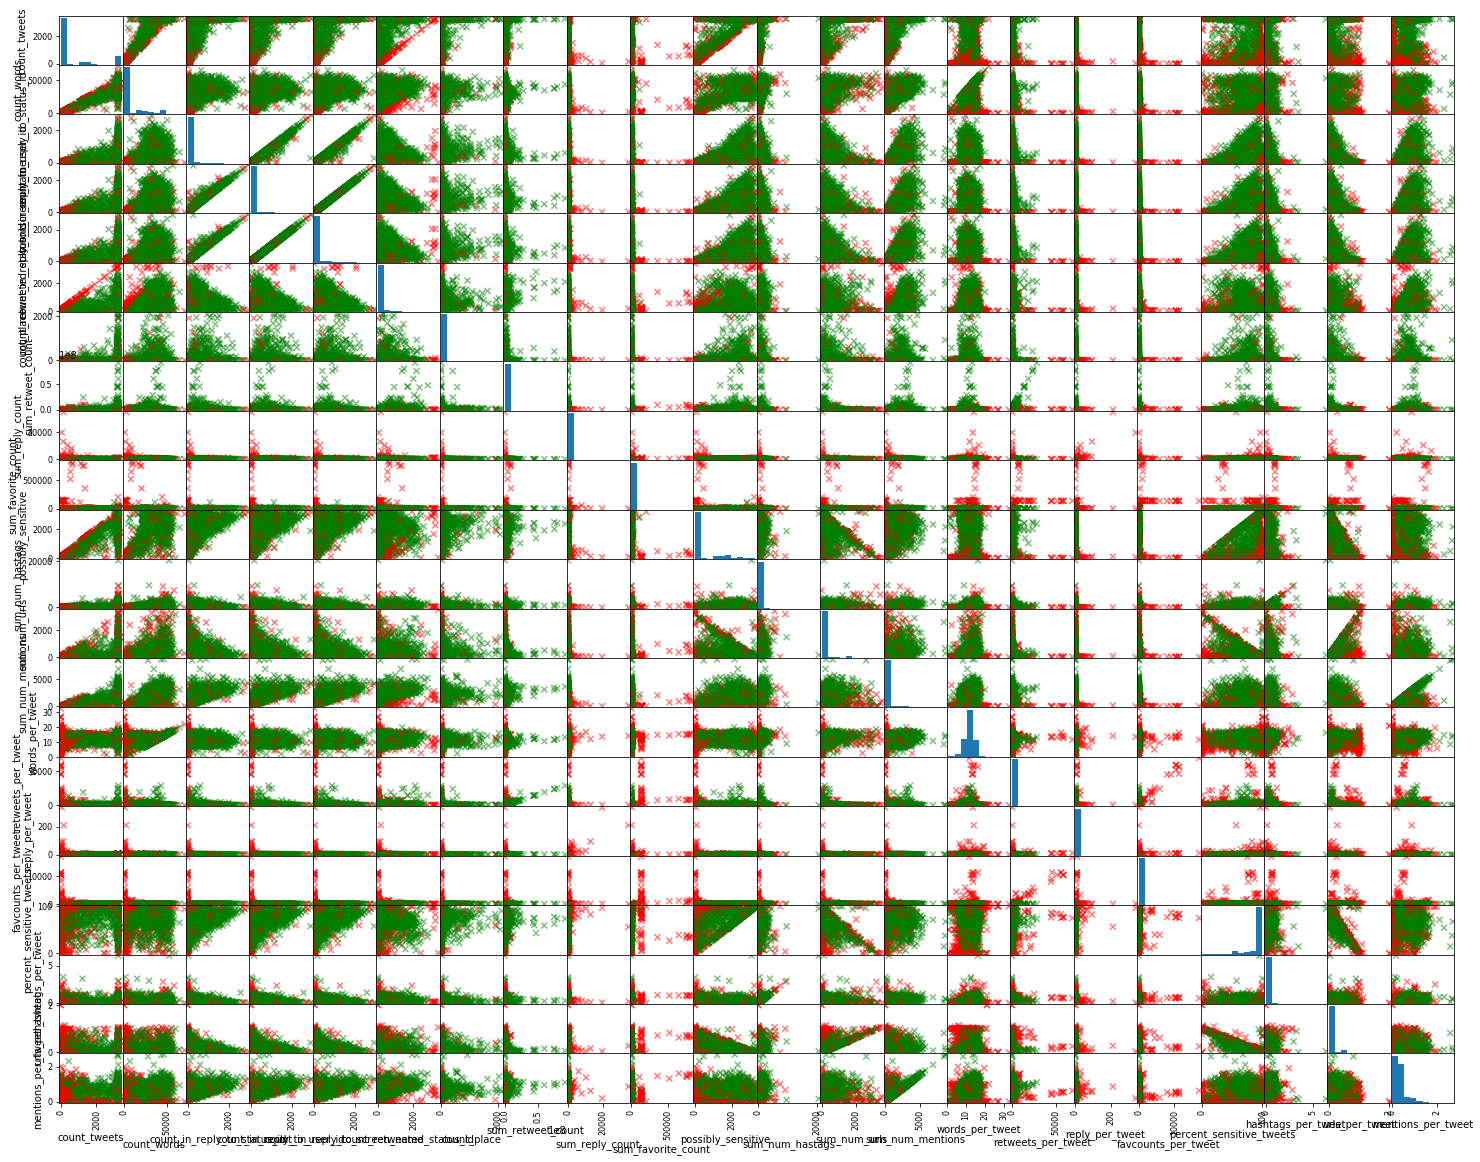

In [12]:
# cols_wanted = ['count_tweets', 'count_words',
#        'count_in_reply_to_status_id', 'count_in_reply_to_user_id', 
#        'count_in_reply_to_screen_name', 'count_retweeted_status_id', 
#        'sum_retweet_count', 'sum_reply_count', 'sum_favorite_count', 
#        'possibly_sensitive', 'sum_num_hastags',
#        'sum_num_mentions']

cols_wanted = ['count_tweets', 'count_words', 'count_in_reply_to_status_id',
               'count_in_reply_to_user_id', 'count_in_reply_to_screen_name',
               'count_retweeted_status_id', 'count_place', 'sum_retweet_count',
               'sum_reply_count', 'sum_favorite_count', 'possibly_sensitive',
               'sum_num_hastags', 'sum_num_urls', 'sum_num_mentions', 'words_per_tweet',
               'retweets_per_tweet', 'reply_per_tweet', 'favcounts_per_tweet',
               'percent_sensitive_tweets', 'hashtags_per_tweet', 'urls_per_tweet',
               'mentions_per_tweet']

# red (=0) or green (=1)
colors = ['red','green']

scatter_matrix(twitterAccts_df[cols_wanted], alpha=0.5, figsize=(25,20), marker='x', 
               c=twitterAccts_df.label.apply(lambda x:colors[x]));

#### Visualizing How Number of Retweets vary with Counts of Tweets

In [13]:
# Partitioning bot accounts and genuine accounts
botAccts = twitterAccts_df.loc[twitterAccts_df["label"] == 0]

genAccts = twitterAccts_df.loc[twitterAccts_df["label"] == 1]

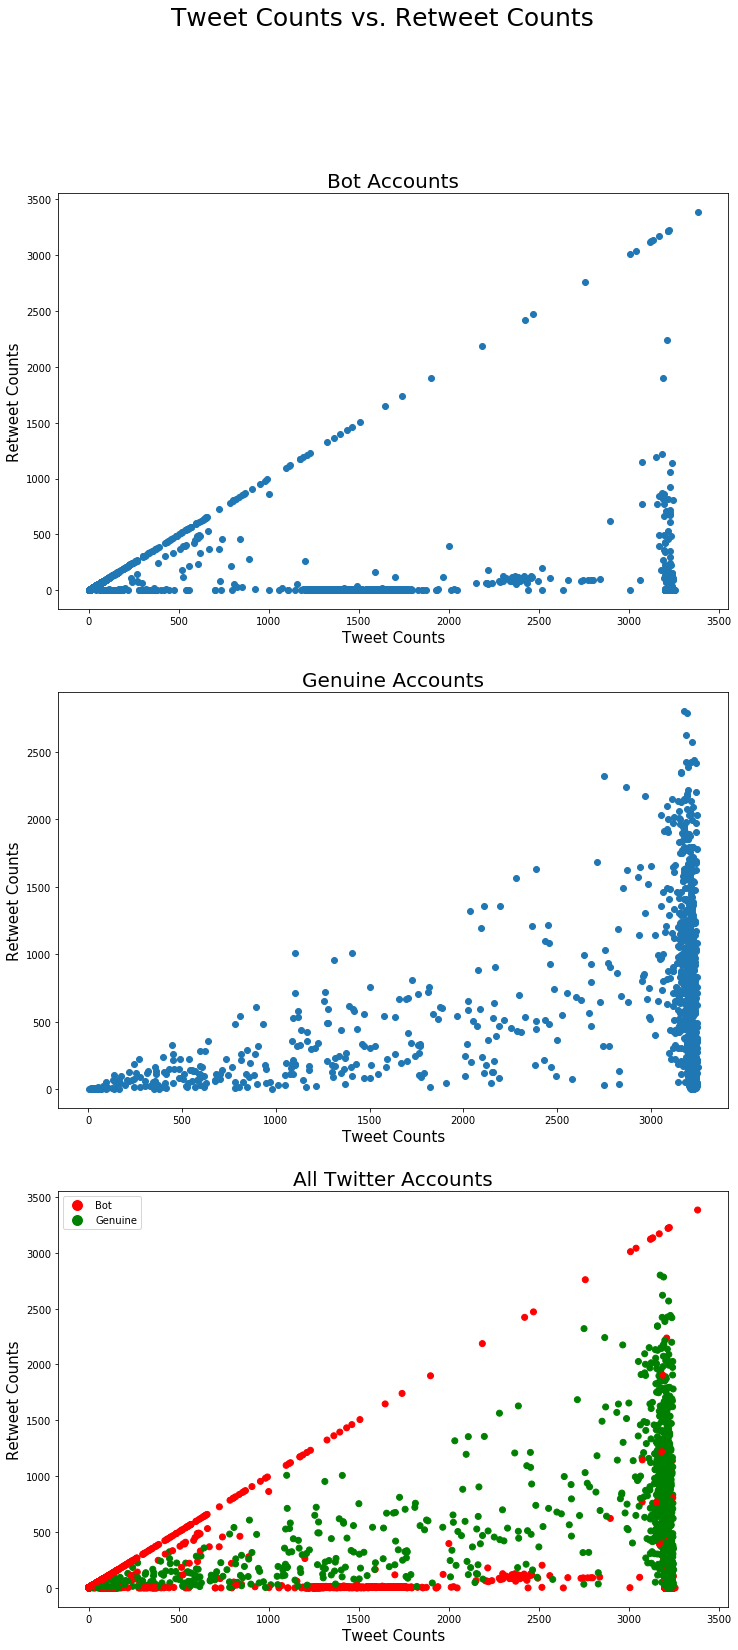

In [14]:
fig, ax = plt.subplots(3,1, figsize=(12,26))
fig.suptitle("Tweet Counts vs. Retweet Counts", fontsize=25)

ax[0].scatter(botAccts["count_tweets"], botAccts["count_retweeted_status_id"])
ax[0].set_title("Bot Accounts", fontsize=20)
ax[0].set_xlabel("Tweet Counts", fontsize=15)
ax[0].set_ylabel("Retweet Counts", fontsize=15)

ax[1].scatter(genAccts["count_tweets"], genAccts["count_retweeted_status_id"])
ax[1].set_title("Genuine Accounts", fontsize=20)
ax[1].set_xlabel("Tweet Counts", fontsize=15)
ax[1].set_ylabel("Retweet Counts", fontsize=15)


ax[2].scatter(twitterAccts_df["count_tweets"], twitterAccts_df["count_retweeted_status_id"], 
              c=twitterAccts_df.label.apply(lambda x:colors[x]))
ax[2].set_title("All Twitter Accounts", fontsize=20)
ax[2].set_xlabel("Tweet Counts", fontsize=15)
ax[2].set_ylabel("Retweet Counts", fontsize=15)
legend_elements = [Line2D([0], [0], marker="o", color="w", label="Bot",
                          markerfacecolor="r", markersize=12),
                   Line2D([0], [0], marker="o", color="w", label="Genuine",
                          markerfacecolor="g", markersize=12)]
ax[2].legend(handles=legend_elements, loc="upper left");

#### Visualizing How Sensitive-Tweets vary with Count of Tweets

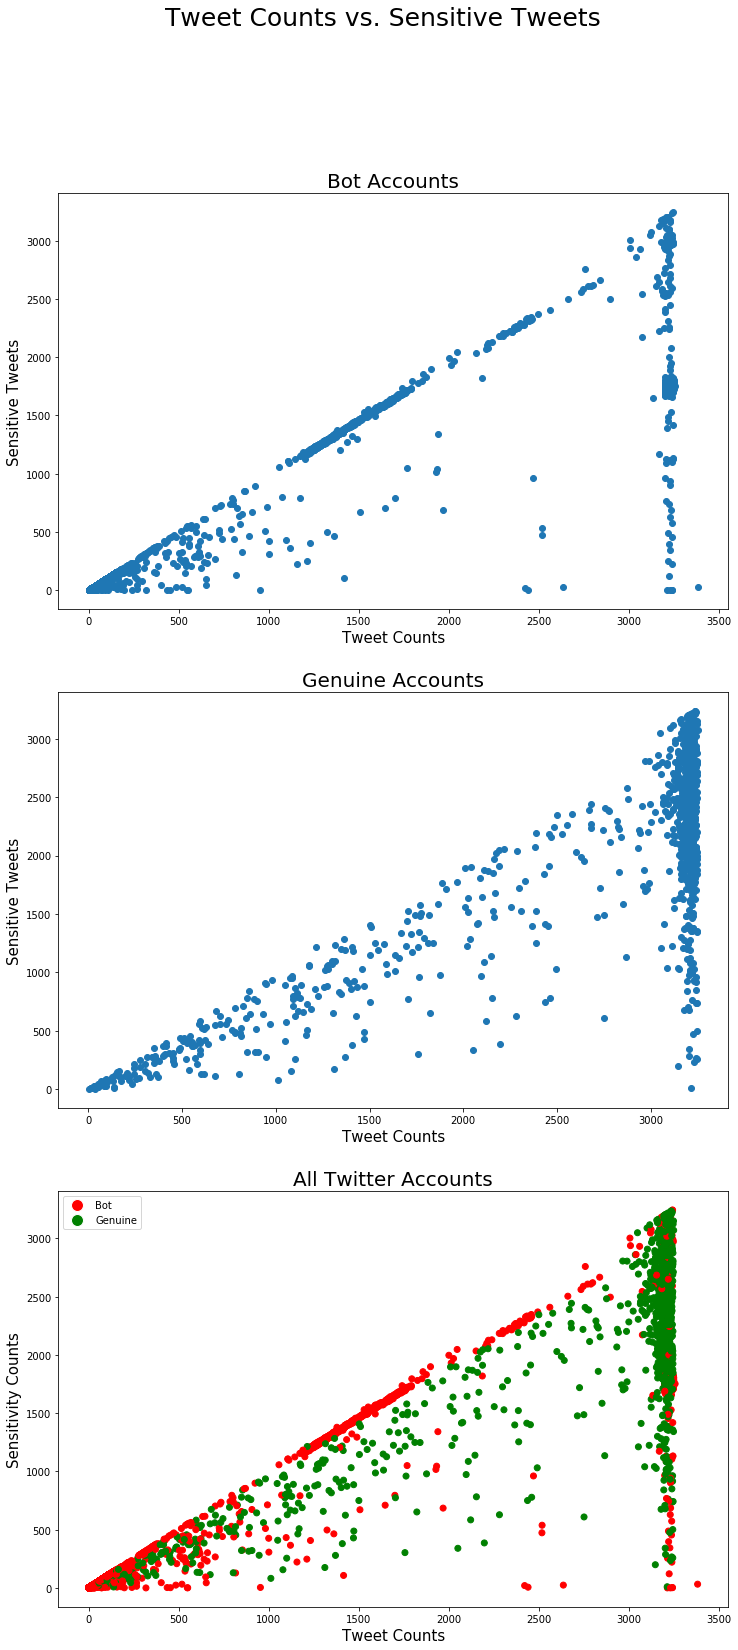

In [15]:
fig, ax = plt.subplots(3,1, figsize=(12,26))
fig.suptitle("Tweet Counts vs. Sensitive Tweets", fontsize=25)

ax[0].scatter(botAccts["count_tweets"], botAccts["possibly_sensitive"])
ax[0].set_title("Bot Accounts", fontsize=20)
ax[0].set_xlabel("Tweet Counts", fontsize=15)
ax[0].set_ylabel("Sensitive Tweets", fontsize=15)

ax[1].scatter(genAccts["count_tweets"], genAccts["possibly_sensitive"])
ax[1].set_title("Genuine Accounts", fontsize=20)
ax[1].set_xlabel("Tweet Counts", fontsize=15)
ax[1].set_ylabel("Sensitive Tweets", fontsize=15)


ax[2].scatter(twitterAccts_df["count_tweets"], twitterAccts_df["possibly_sensitive"], 
              c=twitterAccts_df.label.apply(lambda x:colors[x]))
ax[2].set_title("All Twitter Accounts", fontsize=20)
ax[2].set_xlabel("Tweet Counts", fontsize=15)
ax[2].set_ylabel("Sensitivity Counts", fontsize=15)
legend_elements = [Line2D([0], [0], marker="o", color="w", label="Bot",
                          markerfacecolor="r", markersize=12),
                   Line2D([0], [0], marker="o", color="w", label="Genuine",
                          markerfacecolor="g", markersize=12)]
ax[2].legend(handles=legend_elements, loc="upper left");

#### Visualizing How Number of Retweets vary with Word-Counts

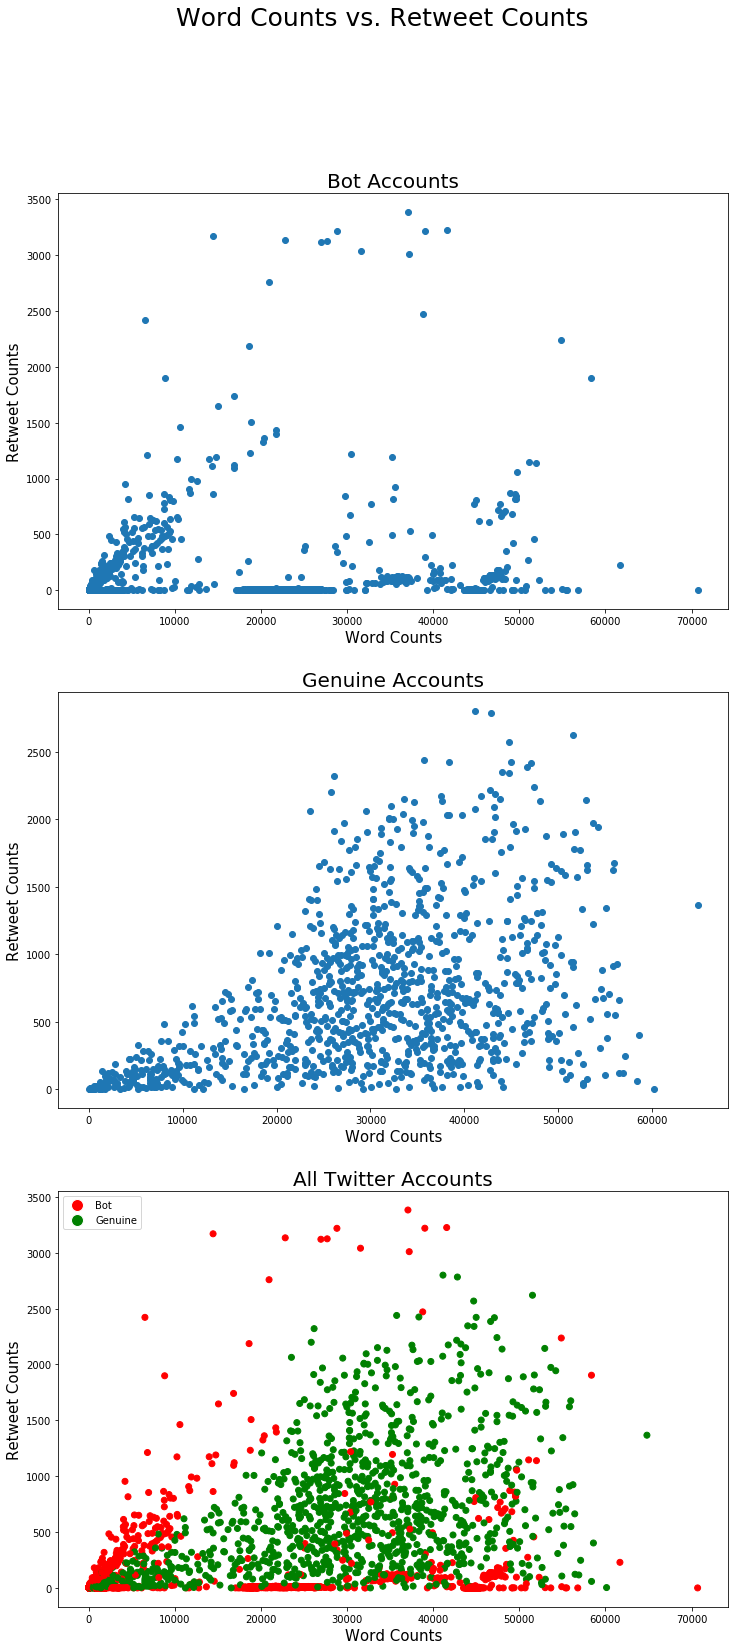

In [16]:
fig, ax = plt.subplots(3,1, figsize=(12,26))
fig.suptitle("Word Counts vs. Retweet Counts", fontsize=25)

ax[0].scatter(botAccts["count_words"], botAccts["count_retweeted_status_id"])
ax[0].set_title("Bot Accounts", fontsize=20)
ax[0].set_xlabel("Word Counts", fontsize=15)
ax[0].set_ylabel("Retweet Counts", fontsize=15)

ax[1].scatter(genAccts["count_words"], genAccts["count_retweeted_status_id"])
ax[1].set_title("Genuine Accounts", fontsize=20)
ax[1].set_xlabel("Word Counts", fontsize=15)
ax[1].set_ylabel("Retweet Counts", fontsize=15)


ax[2].scatter(twitterAccts_df["count_words"], twitterAccts_df["count_retweeted_status_id"], 
              c=twitterAccts_df.label.apply(lambda x:colors[x]))
ax[2].set_title("All Twitter Accounts", fontsize=20)
ax[2].set_xlabel("Word Counts", fontsize=15)
ax[2].set_ylabel("Retweet Counts", fontsize=15)
legend_elements = [Line2D([0], [0], marker="o", color="w", label="Bot",
                          markerfacecolor="r", markersize=12),
                   Line2D([0], [0], marker="o", color="w", label="Genuine",
                          markerfacecolor="g", markersize=12)]
ax[2].legend(handles=legend_elements, loc="upper left");

#### Visualizing How Words-Per-Tweet vary with URLs-Per-Tweet

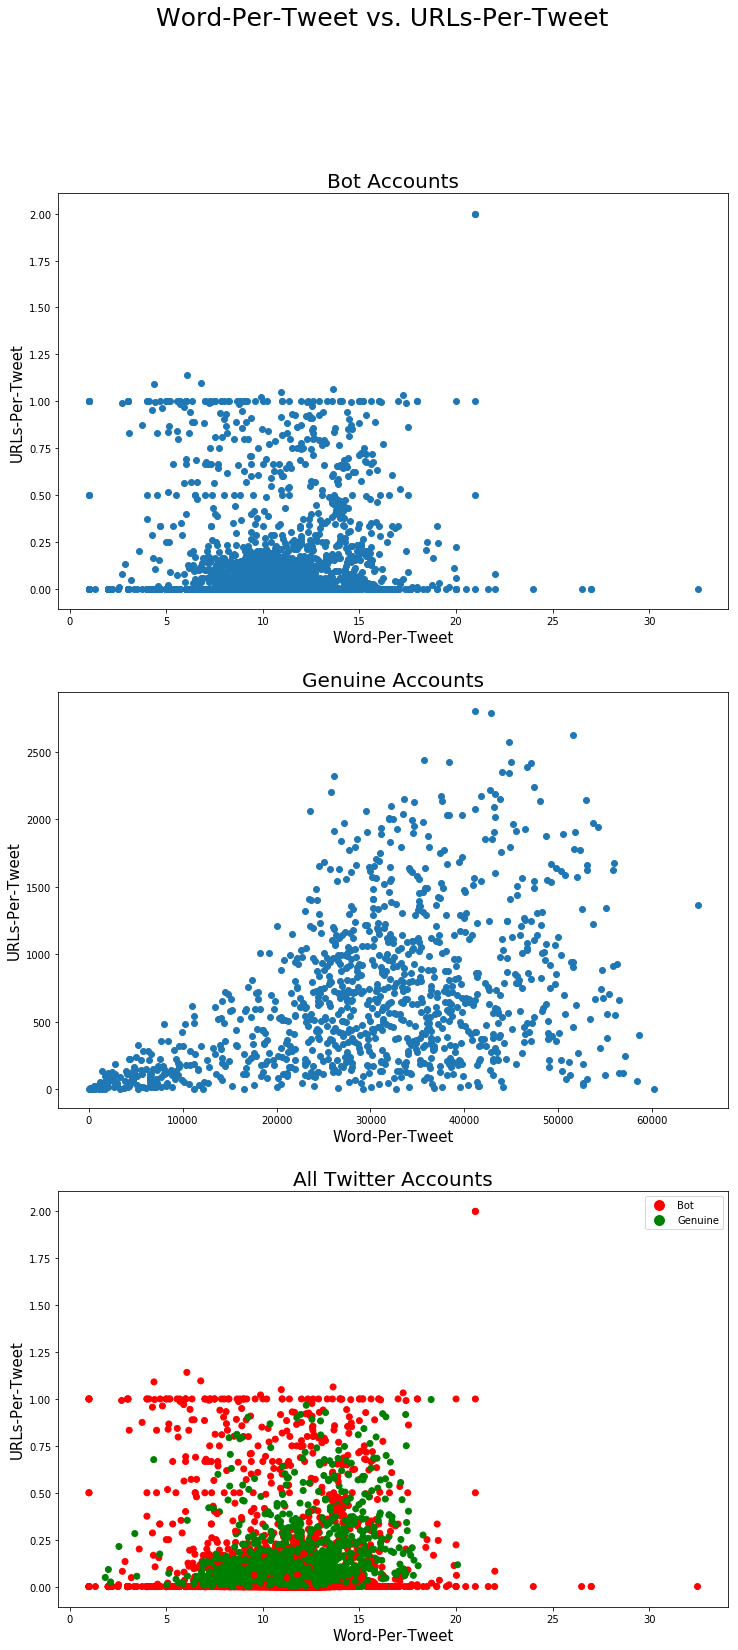

In [17]:
fig, ax = plt.subplots(3,1, figsize=(12,26))
fig.suptitle("Word-Per-Tweet vs. URLs-Per-Tweet", fontsize=25)

ax[0].scatter(botAccts["words_per_tweet"], botAccts["urls_per_tweet"])
ax[0].set_title("Bot Accounts", fontsize=20)
ax[0].set_xlabel("Word-Per-Tweet", fontsize=15)
ax[0].set_ylabel("URLs-Per-Tweet", fontsize=15)

ax[1].scatter(genAccts["count_words"], genAccts["count_retweeted_status_id"])
ax[1].set_title("Genuine Accounts", fontsize=20)
ax[1].set_xlabel("Word-Per-Tweet", fontsize=15)
ax[1].set_ylabel("URLs-Per-Tweet", fontsize=15)


ax[2].scatter(twitterAccts_df["words_per_tweet"], twitterAccts_df["urls_per_tweet"], 
              c=twitterAccts_df.label.apply(lambda x:colors[x]))
ax[2].set_title("All Twitter Accounts", fontsize=20)
ax[2].set_xlabel("Word-Per-Tweet", fontsize=15)
ax[2].set_ylabel("URLs-Per-Tweet", fontsize=15)
legend_elements = [Line2D([0], [0], marker="o", color="w", label="Bot",
                          markerfacecolor="r", markersize=12),
                   Line2D([0], [0], marker="o", color="w", label="Genuine",
                          markerfacecolor="g", markersize=12)]
ax[2].legend(handles=legend_elements, loc="upper right");

### Revised Project Questions

Upon a visual inspection the data, it looks like the attributes of `counts_words`, `counts_tweets`, `Word-Per-Tweet`, and `possibly_sensitive` may be relevant to classifying a Twitter account as a bot or genuine. We propose to answer how bot accounts and genuine counts tweet differently based on these attributes. 

### Building the Baseline Model

In [30]:
# splitting into test/traindf

train_data, test_data = train_test_split(twitterAccts_df, test_size = 0.25, random_state = 42)

In [31]:
print('training data size:', train_data.shape)
print('test data size:', test_data.shape)

training data size: (6897, 23)
test data size: (2300, 23)


In [39]:
# define variables

y_train = train_data['count_tweets']
y_test = test_data['count_tweets']

x_train = train_data.loc[:, train_data.columns != 'count_tweets']
x_test = test_data.loc[:, test_data.columns != 'count_tweets']

In [40]:
# OLS regression using statsmodel

X = sm.add_constant(x_train)
OLSModel = sm.OLS(y_train, X).fit()

print('R2 for training set:', OLSModel.rsquared)

R2 for training set: 0.9960065186885122


In [42]:
# test model

r2_test = r2_score(y_test, OLSModel.predict(sm.add_constant(x_test)))
print('R2 for test model:', r2_test)

R2 for test model: 0.9952431332015333


In [46]:
# One example of LinReg between two variables

x_train1 = train_data['possibly_sensitive']
x_test1 = test_data['possibly_sensitive']

X1 = sm.add_constant(x_train1)
OLSModel2 = sm.OLS(y_train, X1).fit()

print('R2 for training set:', OLSModel2.rsquared)

R2 for training set: 0.895681961757316


In [48]:
# test model for this 

r2_test = r2_score(y_test, OLSModel2.predict(sm.add_constant(x_test1)))
print('R2 for test model:', r2_test)

R2 for test model: 0.8948906745464498
